In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [65]:
df = pd.read_csv("/content/data_science.csv")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [67]:
df = df.drop(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1)

In [68]:
df

,tweet
0,What can be done? - Never blindly trust an ab...
1,"""We need a paradigm shift from model-centric t..."
2,Using high-resolution satellite data and compu...
3,.@Stephenson_Data shares four steps that will ...
4,"""Curricula is inherently brittle in a world wh..."
...,...
28033,Check out current #AI and #MachineLearning Bes...
28034,Here are some of my favorite books &amp; thing...
28035,#AI to support innovative #DeepLearning Workfl...
28036,The #DataScience Landscape: https://t.co/awGU...


In [69]:
#clean tweets

def clean_twts(text):
  text = str(text)
  text = text.lower()
  text = re.sub(r'@[_A-Za-z0-9]+','', text) #remove @mentions
  text = re.sub(r'#','', text) #remove #
  text = re.sub(r'RT[\s]+', '', text) #remove rt
  text = re.sub('http[s]?://\S+', '', text) #remove hyperlink
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text) #remove emojis

  return text

df['tweet'] = df['tweet'].apply(clean_twts)

df

,tweet
0,what can be done? - never blindly trust an ab...
1,"""we need a paradigm shift from model-centric t..."
2,using high-resolution satellite data and compu...
3,. shares four steps that will help new data sc...
4,"""curricula is inherently brittle in a world wh..."
...,...
28033,check out current ai and machinelearning best ...
28034,here are some of my favorite books &amp; thing...
28035,ai to support innovative deeplearning workflow...
28036,the datascience landscape: ———— bigdata ai m...


In [70]:
#subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['tweet'].apply(getSubjectivity)
df['polarity'] = df['tweet'].apply(getPolarity)

df

,tweet,subjectivity,polarity
0,what can be done? - never blindly trust an ab...,0.566667,0.026190
1,"""we need a paradigm shift from model-centric t...",0.400000,0.000000
2,using high-resolution satellite data and compu...,0.500000,-0.333333
3,. shares four steps that will help new data sc...,0.477273,0.234848
4,"""curricula is inherently brittle in a world wh...",0.350000,0.100000
...,...,...,...
28033,check out current ai and machinelearning best ...,0.350000,0.500000
28034,here are some of my favorite books &amp; thing...,0.750000,0.500000
28035,ai to support innovative deeplearning workflow...,1.000000,0.500000
28036,the datascience landscape: ———— bigdata ai m...,0.000000,0.000000


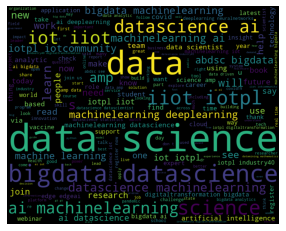

In [89]:
#wordcloud 

allwords = ''.join([twts for twts in df['tweet']])
wordcloud = WordCloud(width=1000, height=800, random_state = 21, max_font_size=200).generate(allwords)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [72]:
#compute sentiment
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiment'] = df['polarity'].apply(getAnalysis)

df

,tweet,subjectivity,polarity,Sentiment
0,what can be done? - never blindly trust an ab...,0.566667,0.026190,Positive
1,"""we need a paradigm shift from model-centric t...",0.400000,0.000000,Neutral
2,using high-resolution satellite data and compu...,0.500000,-0.333333,Negative
3,. shares four steps that will help new data sc...,0.477273,0.234848,Positive
4,"""curricula is inherently brittle in a world wh...",0.350000,0.100000,Positive
...,...,...,...,...
28033,check out current ai and machinelearning best ...,0.350000,0.500000,Positive
28034,here are some of my favorite books &amp; thing...,0.750000,0.500000,Positive
28035,ai to support innovative deeplearning workflow...,1.000000,0.500000,Positive
28036,the datascience landscape: ———— bigdata ai m...,0.000000,0.000000,Neutral


In [81]:
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['tweet']

positive = ptweets.shape[0]
positive

15233

In [82]:
ntweets = df[df.Sentiment == 'Negative']
ntweets = ntweets['tweet']

negative = ntweets.shape[0]

In [83]:
neutral_tweets = df[df.Sentiment == 'Neutral']
neutral_tweets = neutral_tweets['tweet']
neutral = neutral_tweets.shape[0]

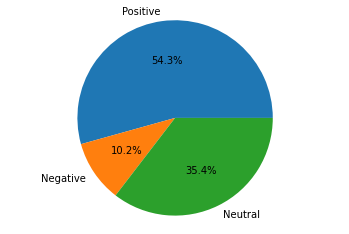

In [86]:
labels= ['Positive', 'Negative', 'Neutral']
sizes= [positive, negative, neutral]
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

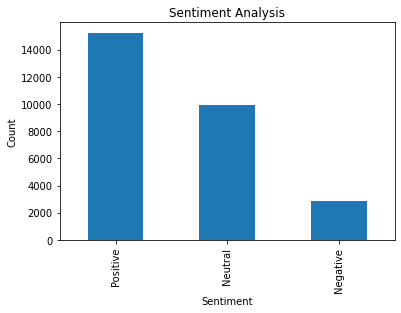

In [87]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()